In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/GitHub/mestrado/Resultados mestrado.csv")
print(df)

    Model                      Dataset          Kind of input  \
0     VAR           Amazon Stock Price  Grouped into boxplots   
1     VAR           Amazon Stock Price  Grouped into boxplots   
2     VAR           Amazon Stock Price  Grouped into boxplots   
3     VAR  Beijing PM2.5 Air Pollution  Grouped into boxplots   
4     VAR  Beijing PM2.5 Air Pollution  Grouped into boxplots   
..    ...                          ...                    ...   
145  LSTM                      USD/CHF             Raw series   
146  LSTM                      USD/CHF             Raw series   
147  LSTM                      USD/CHF  Grouped into boxplots   
148  LSTM                      USD/CHF  Grouped into boxplots   
149  LSTM                      USD/CHF  Grouped into boxplots   

     Steps ahead predicted  Test MMRE               MONETÁRIO?  \
0                        1     0.1132  NÃO É COTAÇÃO DE MOEDAS   
1                        5     0.2038  NÃO É COTAÇÃO DE MOEDAS   
2                    

In [2]:
from matplotlib import pyplot as plt

In [3]:
df.columns

Index(['Model', 'Dataset', 'Kind of input', 'Steps ahead predicted',
       'Test MMRE', 'MONETÁRIO?', 'AUTOCOVARIÂNCIA'],
      dtype='object')

In [4]:
df_1_step = df[df['Steps ahead predicted'] == 1]
df_5_steps = df[df['Steps ahead predicted'] == 5]
df_20_steps = df[df['Steps ahead predicted'] == 20]

In [5]:
df_1_step['Model'].unique()

array(['VAR', 'ARIMA', 'LSTM'], dtype=object)

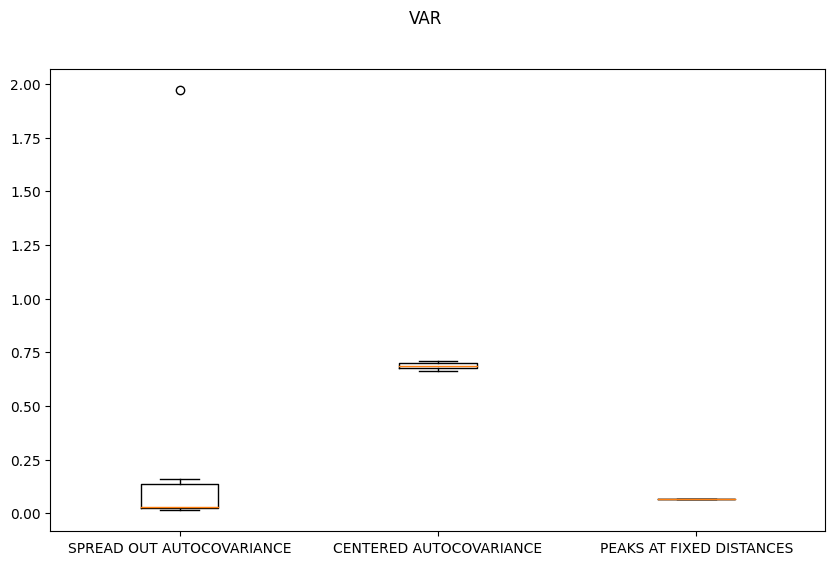

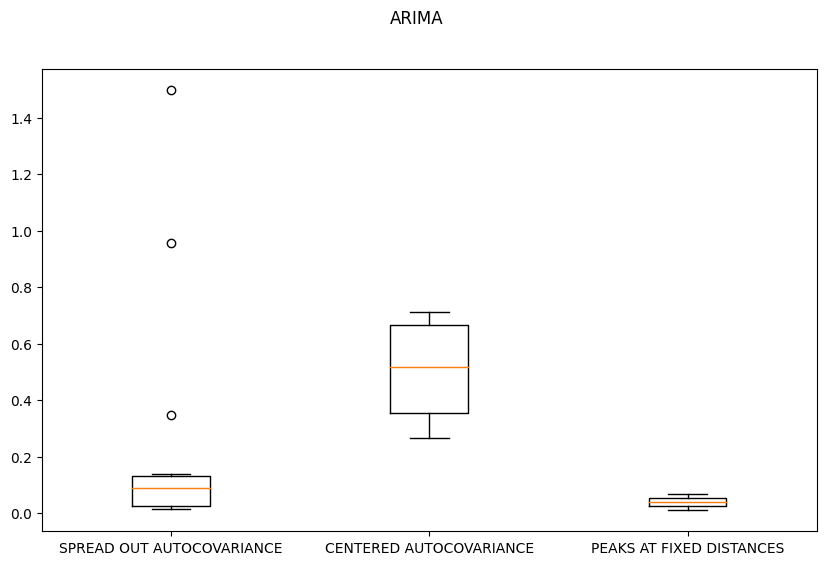

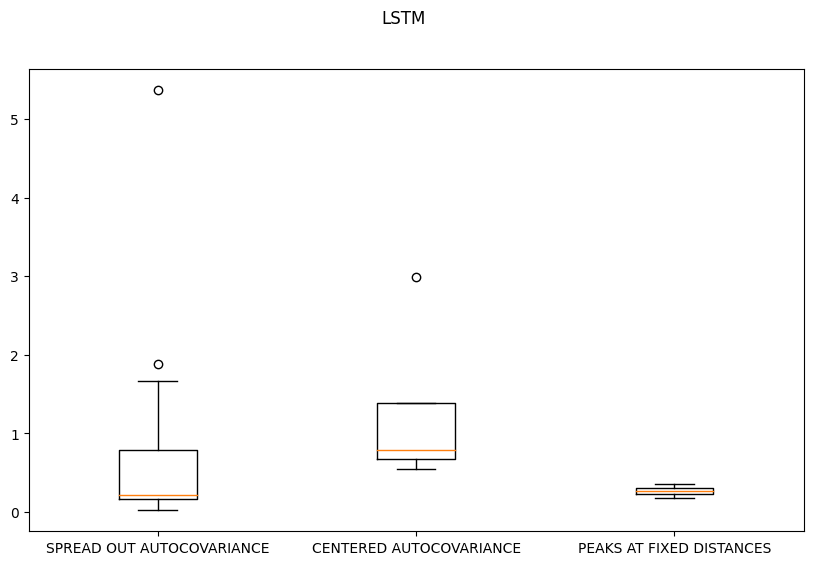

In [6]:
for model in df_1_step['Model'].unique():
    current_model_results = df_1_step[df_1_step['Model'] == model]
    a_cv_types = list(current_model_results['AUTOCOVARIÂNCIA'].unique())
    plt.figure(figsize=(10,6))
    plt.boxplot([current_model_results[current_model_results['AUTOCOVARIÂNCIA'] == a_cv_type]['Test MMRE'] for a_cv_type in a_cv_types], labels=a_cv_types)
    plt.suptitle(model)

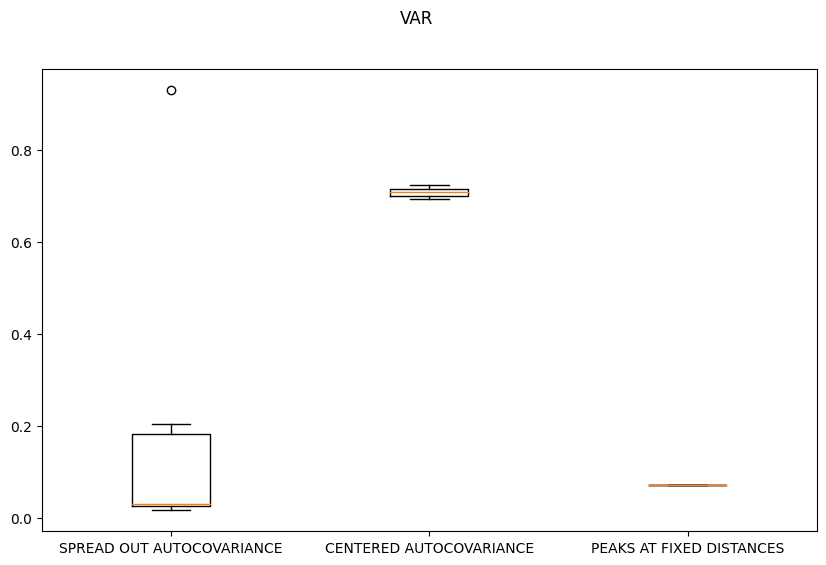

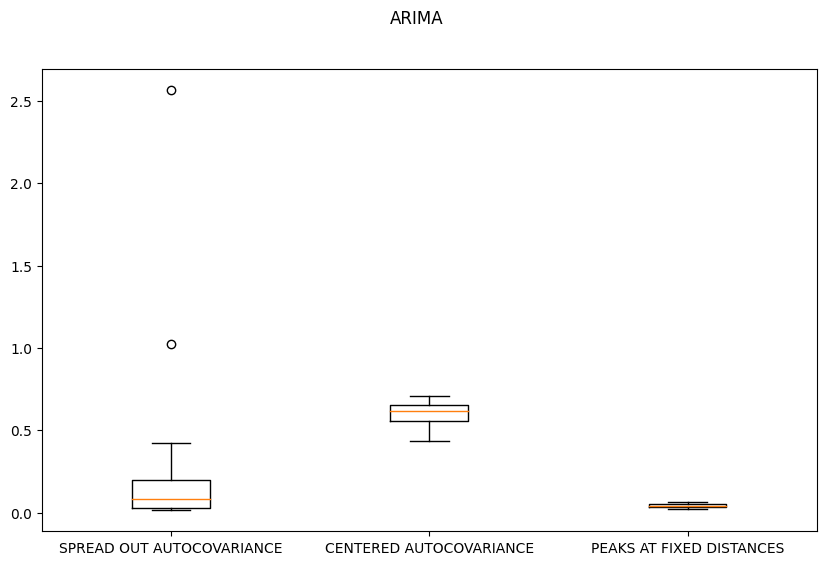

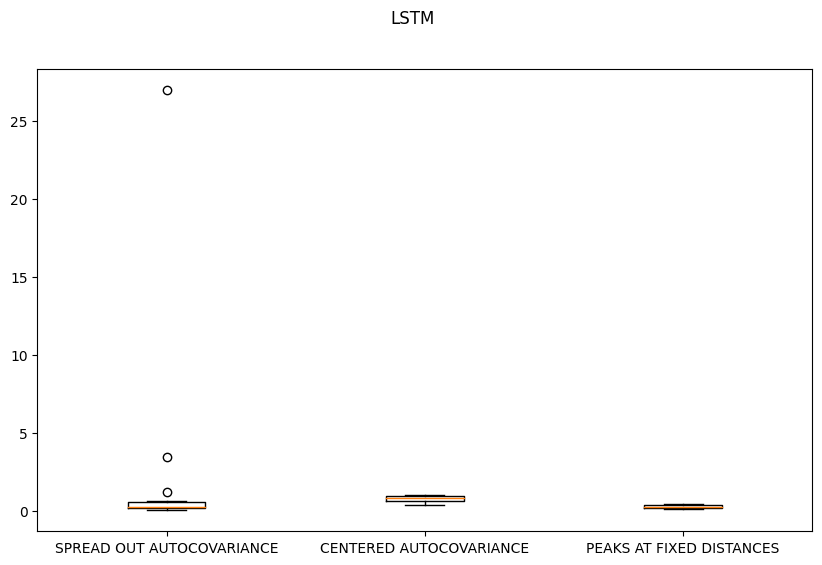

In [7]:
for model in df_5_steps['Model'].unique():
    current_model_results = df_5_steps[df_5_steps['Model'] == model]
    a_cv_types = list(current_model_results['AUTOCOVARIÂNCIA'].unique())
    plt.figure(figsize=(10,6))
    plt.boxplot([current_model_results[current_model_results['AUTOCOVARIÂNCIA'] == a_cv_type]['Test MMRE'] for a_cv_type in a_cv_types], labels=a_cv_types)
    plt.suptitle(model)

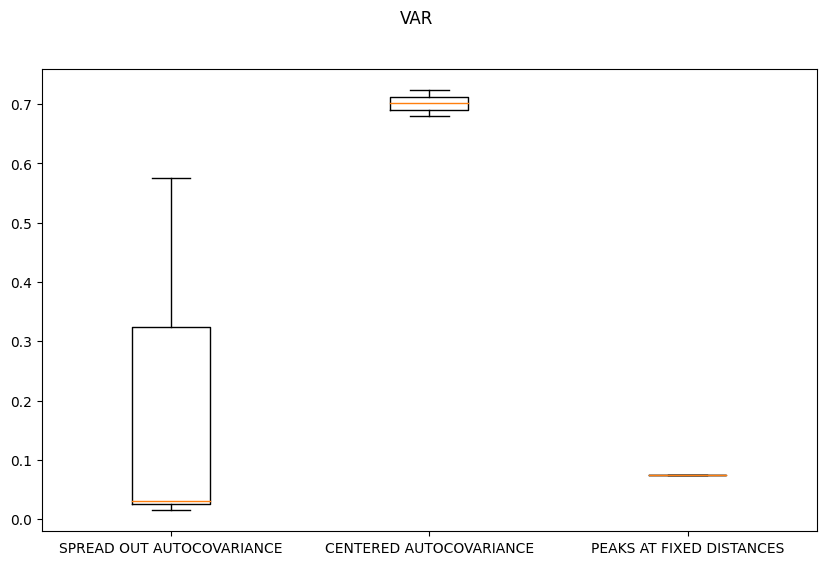

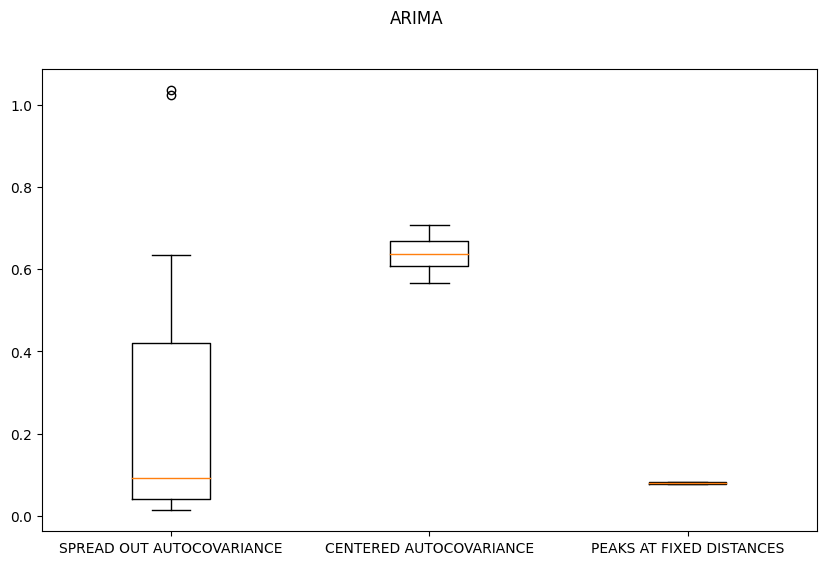

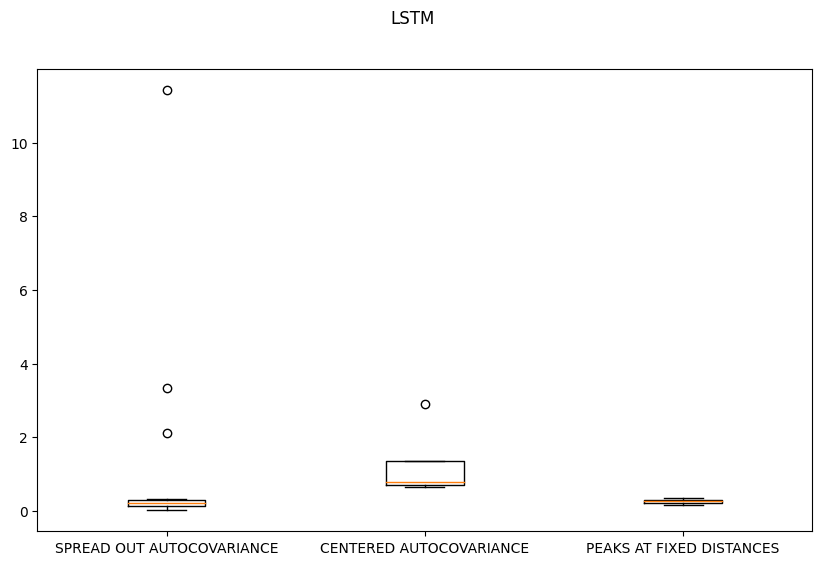

In [8]:
for model in df_20_steps['Model'].unique():
    current_model_results = df_20_steps[df_20_steps['Model'] == model]
    a_cv_types = list(current_model_results['AUTOCOVARIÂNCIA'].unique())
    plt.figure(figsize=(10,6))
    plt.boxplot([current_model_results[current_model_results['AUTOCOVARIÂNCIA'] == a_cv_type]['Test MMRE'] for a_cv_type in a_cv_types], labels=a_cv_types)
    plt.suptitle(model)

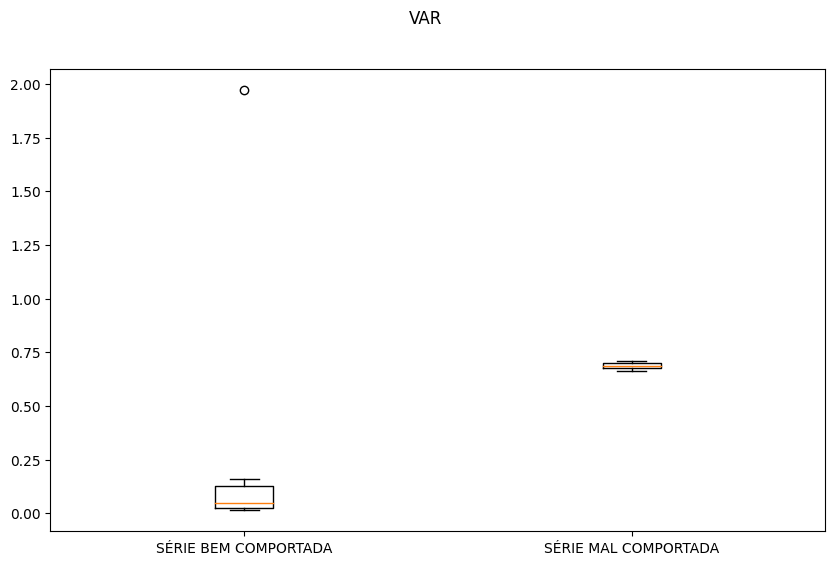

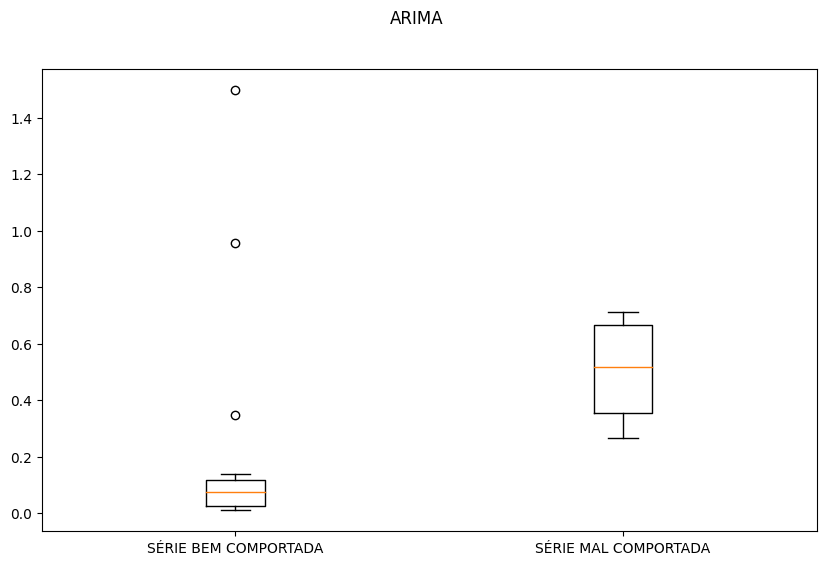

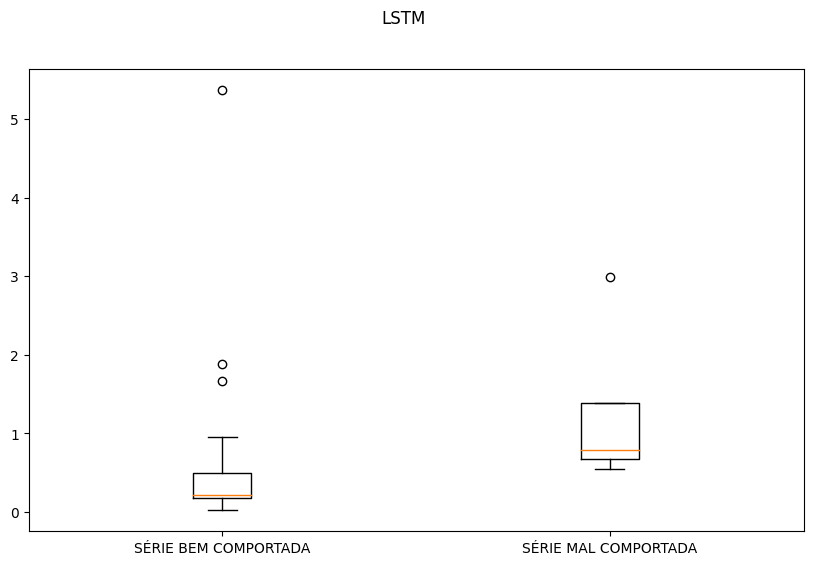

In [11]:
for model in df_1_step['Model'].unique():
    current_model_results = df_1_step[df_1_step['Model'] == model]
    plt.figure(figsize=(10,6))
    plt.boxplot([
        current_model_results[current_model_results['AUTOCOVARIÂNCIA'] != 'CENTERED AUTOCOVARIANCE']['Test MMRE'],
        current_model_results[current_model_results['AUTOCOVARIÂNCIA'] == 'CENTERED AUTOCOVARIANCE']['Test MMRE']
    ],
                labels=['SÉRIE BEM COMPORTADA', 'SÉRIE MAL COMPORTADA'])
    plt.suptitle(model)

{'whiskers': [<matplotlib.lines.Line2D at 0x268e99cd3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x268e99cd910>,
 'boxes': [<matplotlib.lines.Line2D at 0x268e99cd130>,
 'medians': [<matplotlib.lines.Line2D at 0x268e99cde50>,
 'fliers': [<matplotlib.lines.Line2D at 0x268e9973130>,
 'means': []}

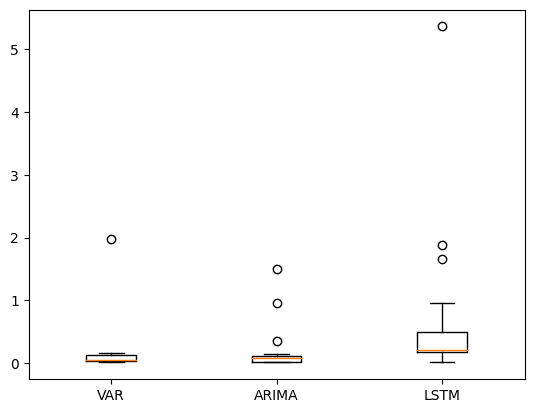

In [13]:
serie_bem_comportada_1_passo = df_1_step[df_1_step['AUTOCOVARIÂNCIA'] != 'CENTERED AUTOCOVARIANCE']
models = list(df_1_step['Model'].unique())
plt.boxplot([serie_bem_comportada_1_passo[serie_bem_comportada_1_passo['Model'] == model]['Test MMRE'] for model in models], labels=models)

{'whiskers': [<matplotlib.lines.Line2D at 0x268e9e57e20>,
 'caps': [<matplotlib.lines.Line2D at 0x268e99d73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x268e9e57b80>,
 'medians': [<matplotlib.lines.Line2D at 0x268e99d7850>,
 'fliers': [<matplotlib.lines.Line2D at 0x268e99d7af0>,
 'means': []}

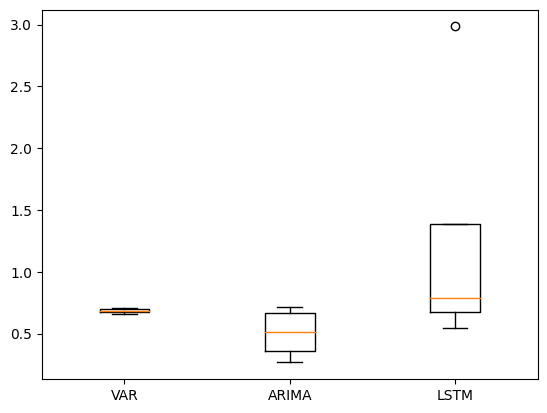

In [14]:
serie_mal_comportada_1_passo = df_1_step[df_1_step['AUTOCOVARIÂNCIA'] == 'CENTERED AUTOCOVARIANCE']
models = list(df_1_step['Model'].unique())
plt.boxplot([serie_mal_comportada_1_passo[serie_mal_comportada_1_passo['Model'] == model]['Test MMRE'] for model in models], labels=models)

Text(0.5, 0.98, '1 passo à frente, conjuntos "bem-comportados"')

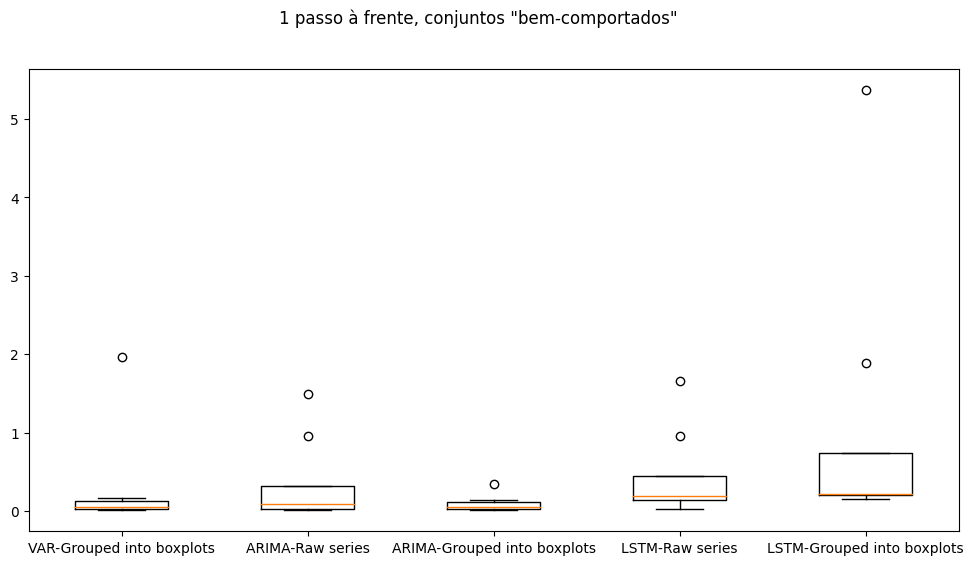

In [35]:
serie_bem_comportada_1_passo = df_1_step[df_1_step['AUTOCOVARIÂNCIA'] != 'CENTERED AUTOCOVARIANCE']
plt.figure(figsize=(12,6))
models_and_grouping = list(df_1_step[['Model', 'Kind of input']].apply(lambda row: row['Model'] + '-' + row['Kind of input'], axis=1).unique())
conjuntos_de_scores = [serie_bem_comportada_1_passo[np.logical_and(serie_bem_comportada_1_passo['Model'] == model_and_grouping.split('-')[0], serie_bem_comportada_1_passo['Kind of input'] == model_and_grouping.split('-')[1])]['Test MMRE'] for model_and_grouping in models_and_grouping]
plt.boxplot(conjuntos_de_scores, labels=models_and_grouping)
plt.suptitle('1 passo à frente, conjuntos "bem-comportados"')

Text(0.5, 0.98, '1 passo à frente, conjuntos "mal-comportados"')

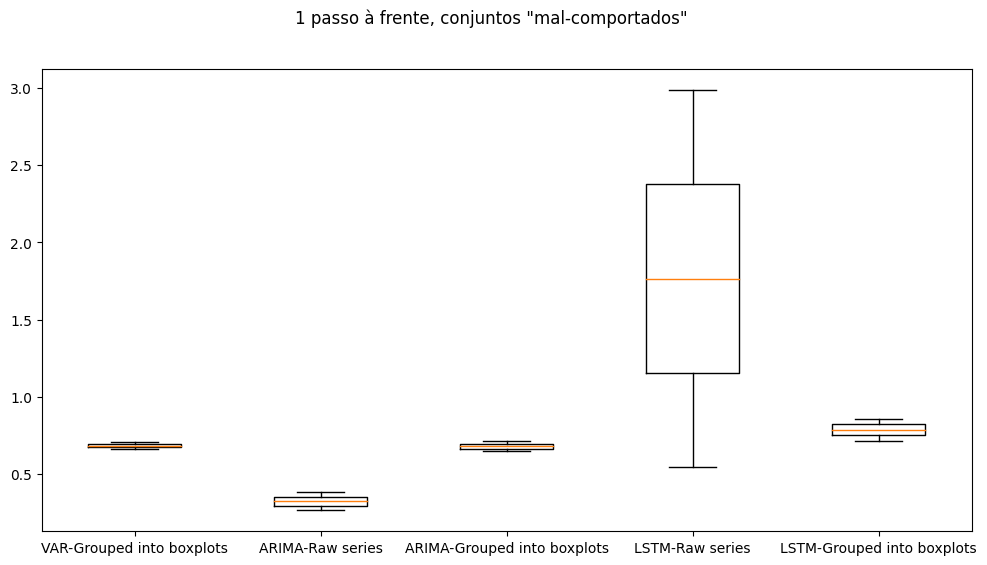

In [34]:
serie_mal_comportada_1_passo = df_1_step[df_1_step['AUTOCOVARIÂNCIA'] == 'CENTERED AUTOCOVARIANCE']
plt.figure(figsize=(12,6))
models_and_grouping = list(df_1_step[['Model', 'Kind of input']].apply(lambda row: row['Model'] + '-' + row['Kind of input'], axis=1).unique())
conjuntos_de_scores = [serie_mal_comportada_1_passo[np.logical_and(serie_mal_comportada_1_passo['Model'] == model_and_grouping.split('-')[0], serie_mal_comportada_1_passo['Kind of input'] == model_and_grouping.split('-')[1])]['Test MMRE'] for model_and_grouping in models_and_grouping]
plt.boxplot(conjuntos_de_scores, labels=models_and_grouping)
plt.suptitle('1 passo à frente, conjuntos "mal-comportados"')

Text(0.5, 0.98, '5 passos à frente, conjuntos "bem-comportados"')

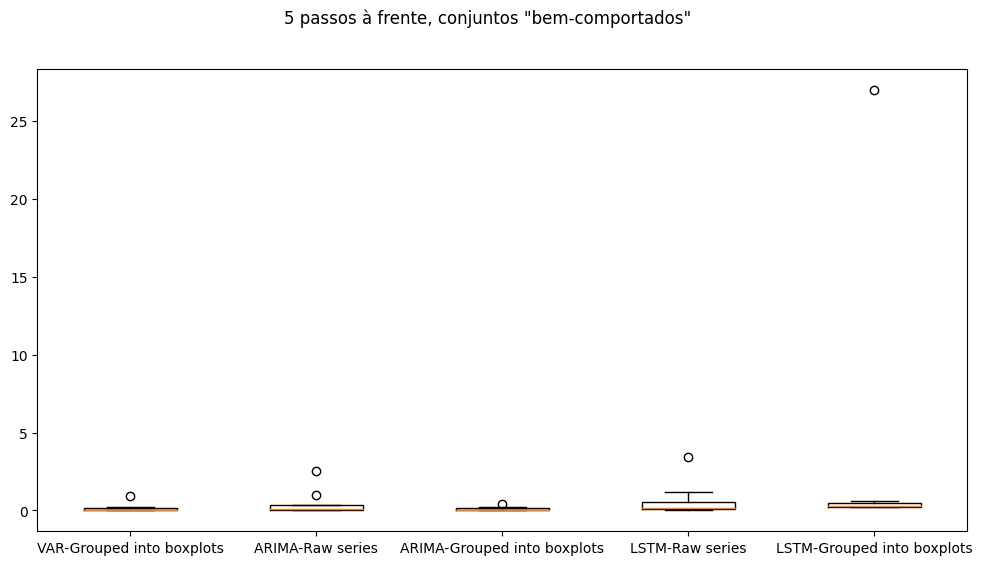

In [33]:
serie_bem_comportada_5_passos = df_5_steps[df_5_steps['AUTOCOVARIÂNCIA'] != 'CENTERED AUTOCOVARIANCE']
plt.figure(figsize=(12,6))
models_and_grouping = list(df_5_steps[['Model', 'Kind of input']].apply(lambda row: row['Model'] + '-' + row['Kind of input'], axis=1).unique())
conjuntos_de_scores = [serie_bem_comportada_5_passos[np.logical_and(serie_bem_comportada_5_passos['Model'] == model_and_grouping.split('-')[0], serie_bem_comportada_5_passos['Kind of input'] == model_and_grouping.split('-')[1])]['Test MMRE'] for model_and_grouping in models_and_grouping]
plt.boxplot(conjuntos_de_scores, labels=models_and_grouping)
plt.suptitle('5 passos à frente, conjuntos "bem-comportados"')

Text(0.5, 0.98, '20 passos à frente, conjuntos "bem-comportados"')

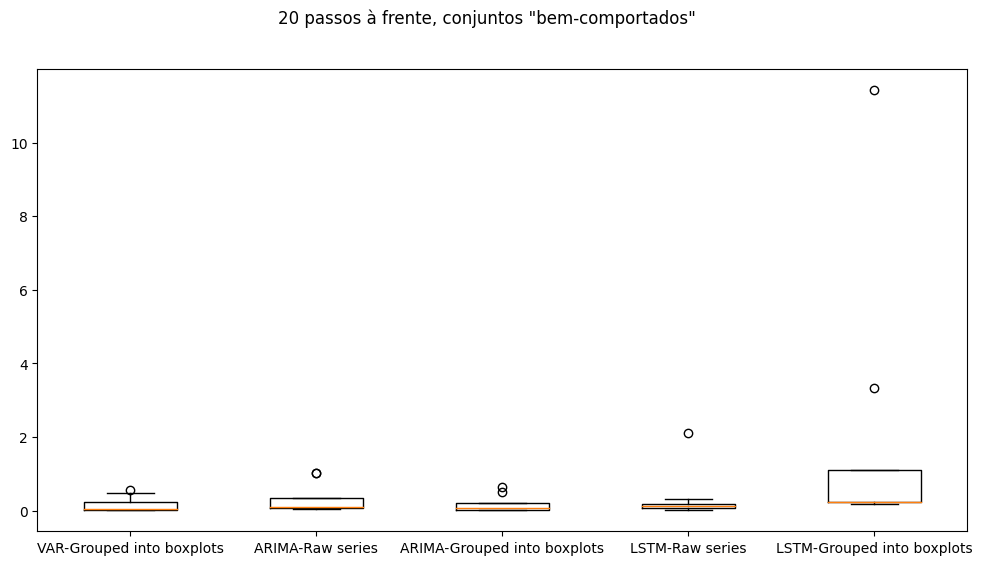

In [32]:
serie_bem_comportada_20_passos = df_20_steps[df_20_steps['AUTOCOVARIÂNCIA'] != 'CENTERED AUTOCOVARIANCE']
plt.figure(figsize=(12,6))
models_and_grouping = list(df_20_steps[['Model', 'Kind of input']].apply(lambda row: row['Model'] + '-' + row['Kind of input'], axis=1).unique())
conjuntos_de_scores = [serie_bem_comportada_20_passos[np.logical_and(serie_bem_comportada_20_passos['Model'] == model_and_grouping.split('-')[0], serie_bem_comportada_20_passos['Kind of input'] == model_and_grouping.split('-')[1])]['Test MMRE'] for model_and_grouping in models_and_grouping]
plt.boxplot(conjuntos_de_scores, labels=models_and_grouping)
plt.suptitle('20 passos à frente, conjuntos "bem-comportados"')